# Exemple de Régression par les Moindres Carrés (OLS)

La méthode canonique du paquet `statsmodels` pour l'ajustement des modèles de régression linéaire selon le critère des moindres carrés (OLS) est la méthode `OLS`.

Les paramètres pris en charge par cette fonction :
- `endog` : `array-like`
    >Une variable de réponse endogène sous forme d'objet compatible avec les arrays à une dimension `numpy`.

- `exog` : `array-like`
    >Un tableau $n\times k$ où $n$ est le nombre d'observations et $k$ est le nombre de régresseurs. Un terme *intercept* n'est pas inclus par défaut et doit être spécifié (au moyen de `add_constant`).

- `missing` : `str`
    >Les options disponibles sont `none`, `drop`, et `raise`. Si `none`, aucune vérification des valeurs `nan` n'est effectuée. `drop` fait que toutes les observations avec des `nan` sont abandonnées. `raise` signale une erreur. La valeur par défaut est `none`.

On commence par charger les paquets nécessaires, entre autres `matplotlib.pyplot` pour le traçage, `numpy` pour la manipulation des matrices et vecteurs et la génération aléatoire, ainsi que `pandas` pour le stockage des données.

In [43]:
# Affichage avec la bibliothèque graphique intégrée à Notebook
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

np.random.seed(7890)

## Estimation Linéaire par les Moindres Carrés

On commence par générer un échantillon de $n=100$ observations du modèle $y_i=1+0.1x_i+10x_i^2+\varepsilon_i$ où $\varepsilon_i\sim\mathcal N(0,1)$. Cet échantillon servera de référence pour l'ajustement ci-après du modèle de régression linéaire de la variable $y$ sur les variables $x$ et $x^2$.

In [44]:
n = 100
x = np.linspace(0, 10, 100)
X = np.column_stack((x, x ** 2))
beta = np.array([1, 0.1, 10])
e = np.random.normal(size=n)

Aucune constante n'est ajoutée au modèle. Il faut entasser une colonne de $1$ manuellement.

In [45]:
X = sm.add_constant(X)
y = np.dot(X, beta) + e

Il s'agit maintenant d'ajuster le modèle de régression linéaire par moindres carrés sur le jeu de donnéees en enchaînant la méthode `fit()` sur le modèle résultant de l'appel `OLS()`. Puis, on affiche le résultat par la méthode `summary()`.

In [46]:
res = sm.OLS(y, X).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.053e+06
Date:                Mon, 02 Jan 2023   Prob (F-statistic):          1.92e-239
Time:                        01:12:41   Log-Likelihood:                -146.14
No. Observations:                 100   AIC:                             298.3
Df Residuals:                      97   BIC:                             306.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6806      0.312      2.185      0.031       0.062       1.299
x1             0.2175      0.144      1.510      0.134      -0.068       0.503
x2             9.9890      0.014    716.877      0.000       9.961      10.017
==============================================================================
Omnibus:                        4.487   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.106   Jarque-Bera (JB):                4.075
Skew:                           0.335   Prob(JB):                        0.130
Kurtosis:                       3.728   Cond. No.                         144.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Les quantités d'intérêt peuvent être extraites directement du modèle ajusté. `dir(results)` pour obtenir une liste complète. Voici quelques exemples :

In [47]:
print("Estimations des Paramètres : ", res.params)
print("Coefficient de détermination R2 : ", res.rsquared)

Estimations des Paramètres :  [0.6806226  0.21750693 9.98895028]
Coefficient de détermination R2 :  0.9999880324891753


Force est de constater que le coefficient de détermination est proche de 1. Cela traduit que la proportion de la variabilité observée de $y$ expliquée par le modèle de régression linéaire $\beta_0+\beta_1x+\beta_2x$ est plus de $99\%$, confirmant ainsi le modèle théorique de base employé pour générer l'échantillon.

L'estimation des paramètres selon le critère des moindres carrés étant très précise, les paramètres retrouvés avoisinent les valeurs théoriques $\beta_0=1$, $\beta_1=0.1$ et $\beta_2=10$. 

## Estimation Linéaire en les paramètres par les Moindres Carrés

```{admonition} Rappel
:class: tip
La désignation *linéaire* renvoie à la relation entre les paramètres $\boldsymbol\beta$ et la réponse $y$. $y$ est une fonction linéaire par rapport à $\boldsymbol\beta$, mais pas forcément de(s) variable(s) indépendante(s) (*e.g.* le modèle $y=e^x\beta+\varepsilon$ est bel et bien linéaire).
```

On simule pour cette section un jeu de données artificel avec une relation non-linéaire entre $x$ et $y$ : $y_i=5+0.5x_i+0.5\sin(x_i)-0.02(x_i-5)^2+\varepsilon_i$ avec des erreurs $\varepsilon_i\sim\mathcal N(0,0.5^2)$. C'est bien un modèle linéaire, car il l'est pour les paramètres.

In [48]:
sig = 0.5
x = np.linspace(0, 20, n)
X = np.column_stack((x, np.sin(x), (x-5)**2, np.ones(n)))
beta = np.array([0.5, 0.5, -0.02, 5.])
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=n)

In [49]:
res2 = sm.OLS(y, X).fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     398.0
Date:                Mon, 02 Jan 2023   Prob (F-statistic):           5.23e-54
Time:                        01:12:41   Log-Likelihood:                -73.136
No. Observations:                 100   AIC:                             154.3
Df Residuals:                      96   BIC:                             164.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4919      0.019     25.340      0.000       0.453       0.530
x2             0.3458      0.075      4.610      0.000       0.197       0.495
x3            -0.0201      0.002    -11.786      0.000      -0.023      -0.017
const          5.1014      0.126     40.531      0.000       4.852       5.351
==============================================================================
Omnibus:                        0.727   Durbin-Watson:                   2.516
Prob(Omnibus):                  0.695   Jarque-Bera (JB):                0.402
Skew:                           0.141   Prob(JB):                        0.818
Kurtosis:                       3.131   Cond. No.                         223.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

On peut extraire des quantités d'intérêt par la même façon :

In [50]:
print("Estimation des Paramètres : ", res2.params)
print("Erreurs Standards :", res2.bse)
print("Valeurs Prédites : ", res2.predict())
print("Coefficient de Détermination : ", res2.rsquared)

Estimation des Paramètres :  [ 0.4918749   0.34579746 -0.02010405  5.10135543]
Erreurs Standards : [0.01941121 0.07501281 0.0017057  0.1258622 ]
Valeurs Prédites :  [ 4.5987543   4.80730058  5.01138378  5.20829662  5.39555668  5.57100744
  5.73290593  5.87999367  6.01154786  6.12741073  6.227996    6.31427204
  6.38772248  6.45028587  6.50427684  6.55229193  6.597104    6.64154944
  6.68841284  6.74031364  6.79959971  6.86825173  6.94780274  7.03927571
  7.14314196  7.25930198  7.38708951  7.52529857  7.6722326   7.8257734
  7.9834673   8.14262497  8.3004308   8.45405742  8.60078069  8.73809052
  8.86379296  8.9760994   9.07369939  9.15581386  9.22222686  9.27329435
  9.30992968  9.33356646  9.34610027  9.34981152  9.34727275  9.34124394
  9.33456029  9.33001689  9.33025503  9.33765478  9.35423816  9.38158694
  9.42077827  9.47234085  9.5362335   9.61184676  9.69802769  9.79312683
  9.8950652  10.0014189  10.10951773 10.21655373 10.31969545 10.41620307
 10.50353988 10.57947541 10.64217

Plus de $92\%$ de variabilité observée de $y$ est recensée par le modèle, ce dernier s'adapte significativement bien aux données. Les estimations des paramètres sont au voisinage des paramètres théoriques réels :  $\beta_1=0.5$, $\beta_2=0.5$, $\beta_3=-0.02$ et $\beta_0=5$. 

Il est possible de tracer un graphique pour comparer les valeurs sans bruit (*i.e.* sans $\varepsilon$) du modèle aux prédictions par les moindres carrés ordinaires. Les intervalles de prédictions sont construits à l'aide de la commande `wls_prediction_std`.

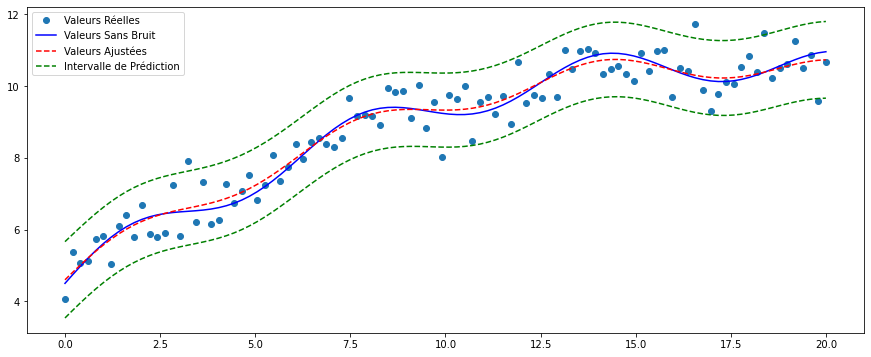

In [51]:
pfstd, iv_sup, iv_inf = wls_prediction_std(res2)
fig, ax = plt.subplots(figsize=(15,6))
    
ax.plot(x, y, 'o', label = 'Valeurs Réelles')
ax.plot(x, y_true, 'b-', label='Valeurs Sans Bruit')
ax.plot(x, res2.fittedvalues, 'r--', label='Valeurs Ajustées')
ax.plot(x, iv_sup, 'g--', label="Intervalle de Prédiction")
ax.plot(x, iv_inf, 'g--')
ax.legend(loc="best")

Les valeurs ajustées sont à peu près identiques aux valeurs sans bruit, ce qui confirme la significativité de l'ajustement du modèle susmentionné aux données. L'intervalle de prédiction encapsule aussi l'écrasante majorité des valeurs observée, de par sa définition.